In [ ]:
# 지금까지는 Sequential을 이용해 network를 생성했다. 이번 chapter에서는 network를 구성하는 다른 방법에 대해 배워보자.
# 그 방법은 Functional이다.

# \_\_call\_\_ magic method
- 객체를 함수처럼 호출 할 수 있도록 한다.
- `객체()` 로 호출 할 때 \_\_call\_\_ 메소드가 호출되어 실행된다.

In [ ]:
# Functional API를 만들 때 call magic method와 비슷한 방식으로 구현한다. 그래서 call magic method에 대해 먼저 간단히 배워보자.

In [1]:
# call magic method 사용법을 알아보기 위해 아래의 class를 만들어보자.
class Person:
    def __init__(self, name):
        self.name = name
    
    def __call__(self):
        print(f'이름: {self.name}')

In [4]:
human = Person('홍길동')

In [5]:
# human1 instance의 이름을 출력해보자. call magic method를 사용하지 않으면 attribute를 직접 호출해야 한다.
# 하지만 call magic method를 사용하면 아래와 같이 instance를 함수처럼 사용해 call magic method를 실행시킬 수 있다.
human()

이름: 홍길동


In [6]:
# 이번에는 다른 class를 만들어보자.
class Person:
    def __init__(self, name):
        self.name = name
    
    def __call__(self, age):
        print(f'이름: {self.name}, 나이: {age}')

In [7]:
human = Person('홍길동')
human(20)

이름: 홍길동, 나이: 20


In [8]:
# return value가 있어도 무관하다.
class Person:
    def __init__(self, name):
        self.name = name
    
    def __call__(self, age):
        return f'이름: {self.name}, 나이: {age}'

In [10]:
human = Person('홍길동')
result = human(20)

print(result)

이름: 홍길동, 나이: 20


In [13]:
# 위 식을 한 줄로 적을 수 있다.
result = Person('홍길동')(20)
print(result)

이름: 홍길동, 나이: 20


In [ ]:
# 위 코드가 핵심이다. Functional API로 network를 구성할 때 위와 같은 형태의 코드를 사용한다.

In [ ]:
# instance의 가장 핵심이 되는 메인 기능을 call magic method에 구현한다.
# 그리고 instance를 함수처럼 사용하면 call magic method가 실행된다.

In [ ]:
# Functional API를 사용할 때 위와 같은 패턴으로 구현된다.

# Functional API
- Sequential 모델은 각 Layer들의 입력과 출력이 하나라고 가정한다. 그리고 각각의 Layer(입력층, 은닉층, 출력층)들을 차례대로 쌓아 구성한다. 그래서 다양한 구조의 네트워크를 만드는데 한계가 있다.
- Functional API를 사용하면 **다중입력, 다중출력, 그래프 형태**의 다양한 형태의 레이어들을 유연하게 구성할 수 있다.

- Functional API는 직접 텐서들의 입출력을 다룬다. 
- 함수호출 처럼 Layer를 이용하여 입력 텐서(Input Tensor)를 입력 받고 그 결과를 출력 텐서(Output Tensor)로 반환하는 형식으로 모델을 구현한다.

```python
input_tensor = Input(shape=(16,))
dense = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(32, activation='sigmoid')(dense)

model = models.Model(input_tensor, output_tensor)
```

## Sequential, Functional API 방식의 차이

### Sequential 방법

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import applications
from tensorflow.keras import layers, models

In [ ]:
# compile을 하지 않고 단순히 model만 만들어보자. 아래는 Sequential을 이용한 간단한 network 예시이다.
# 내가 쌓은 layer를 단순히 순서대로 통과해 결과가 출력된다.
# 각 layer는 하나의 함수이다. 그리고 이 함수들을 단순히 나열했다.
# 여기서는 입력 값과 출력 값의 흐름을 알 수 없다. 단순히 순서대로 통과하기 때문에.

In [12]:
# Network 생성
seq_model = keras.Sequential()
# Input Layer 생성
seq_model.add(layers.Input(shape=(32,32,3)))

seq_model.add(layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
seq_model.add(layers.MaxPooling2D(padding="same"))
seq_model.add(layers.Flatten())

seq_model.add(layers.Dense(units=256, activation='relu'))
seq_model.add(layers.Dense(units=10, activation='softmax', name='output_layer'))
seq_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 256)               4194560   
                                                                 
 output_layer (Dense)        (None, 10)                2570      
                                                                 
Total params: 4,198,922
Trainable params: 4,198,922
Non-trainable params: 0
______________________________________________

### Functional API

In [ ]:
# tensorflow.keras.models module의 Model class를 이용해 구현한다.

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import applications
from tensorflow.keras import layers, models

In [ ]:
# Functional을 사용할 때는 unit / layer / network가 모두 함수라는 점을 명심해야 한다.
# 이들이 함수이므로 Functional 방법을 사용할 수 있는 것이다.

In [ ]:
# Functional 방법에서는 함수의 입력과 출력을 명시해야 한다.
# Sequential에서는 layer를 생성하지만 여기서는 layer가 처리한 값을 생성한다.
# 그래서 입력 값과 출력 값의 흐름을 구현해야 한다.

In [15]:
# layer의 흐름 구조를 구현한다.
# 입력 값을 생성한다. 이는 layer가 아니다. input tensor를 생성한 것이다.
input_tensor = layers.Input(shape = (32, 32, 3))

# Conv2D layer가 처리한 출력 값을 생성한다.
conv_tensor = layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu')(input_tensor)

# MaxPooling2D layer가 처리한 출력 값을 생성한다.
pool_tensor = layers.MaxPooling2D(padding = 'same')(conv_tensor)

# Flatten layer가 처리한 출력 값을 생성한다.
flatten_tensor = layers.Flatten()(pool_tensor)

# Dense layer가 처리한 출력 값을 생성한다.
dense_tensor = layers.Dense(units = 256, activation = 'relu')(flatten_tensor)

# Output Layer(Dense)가 처리한 출력 값을 생성한다.
output_tensor = layers.Dense(units = 10, activation = 'softmax')(dense_tensor)


# network를 생성한다. 이때 입력 값들과 출력 값들을 넣어서 생성하면 된다.
# 학습 / 추론을 할 때 실제 생성될 입력 값과 출력 값을 표현하는 tensor instance를 넣는다.
# 여러 개일 경우 입력 값과 출력 값별로 list로 묶어서 전달한다.
fn_model = models.Model(input_tensor, output_tensor)

In [16]:
fn_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 16384)             0         
                                                                 
 dense_1 (Dense)             (None, 256)               4194560   
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                             

In [ ]:
# Sequential은 단순한 처리밖에 수행하지 못한다. 하지만 Functional은 내가 원하는대로 유연하게 값을 처리할 수 있다.
# Sequential은 layer가 한 줄밖에 없지만 Functional은 여러 갈래로 나뉜 layer 모양으로 network를 구성할 수 있다.
# compile 방식은 똑같다.

##### 일반적으로 각 Layer의 출력 변수들을 통일시킨다. 
- 일반적으로 block 단위로 동일한 변수명을 사용한다.
- Hidden Layer들의 출력 결과는 모두 동일한 변수명을 사용해도 무관하다.

In [18]:
# 입력 값 생성
input_tensor = layers.Input(shape = (32, 32, 3))

# block1 생성
x1 = layers.Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu')(input_tensor)
x1 = layers.MaxPooling2D(padding = 'same')(x1)

# block2 생성
x2 = layers.Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu')(x1)
x2 = layers.MaxPooling2D(padding = 'same')(x2)

# block3 생성
x3 = layers.Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu')(x2)
x3 = layers.MaxPooling2D(padding = 'same')(x3)

# 출력 값 생성
flatten_tensor = layers.Flatten()(x3)
output_tensor = layers.Dense(10, activation = 'softmax')(flatten_tensor)

In [19]:
model = models.Model(input_tensor, output_tensor)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 16)          2320

##### trainable 설정

In [ ]:
# block1의 Conv2D layer를 frozen시켜보자.

In [20]:
# 입력 값 생성
input_tensor = layers.Input(shape = (32, 32, 3))

# block1 생성
c1 = layers.Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu')
c1.trainable = False
x1 = c1(input_tensor)
x1 = layers.MaxPooling2D(padding = 'same')(x1)

# block2 생성
x2 = layers.Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu')(x1)
x2 = layers.MaxPooling2D(padding = 'same')(x2)

# block3 생성
x3 = layers.Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu')(x2)
x3 = layers.MaxPooling2D(padding = 'same')(x3)

# 출력 값 생성
flatten_tensor = layers.Flatten()(x3)
output_tensor = layers.Dense(10, activation = 'softmax')(flatten_tensor)

In [21]:
model = models.Model(input_tensor, output_tensor)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 16)          2320

##### Transfer learning
- Functional을 이용한 transfer learning 방법은 아래와 같다.
- backbone으로 VGG16을 가지고 온다. 이때 backbone은 frozen시킨다.

In [24]:
# backbone 호출
backbone = applications.VGG16(include_top = False)
backbone.trainable = False

# 입력 값 생성
input_tensor = layers.Input(shape = (224, 224, 3))

# backbone 생성
x = backbone(input_tensor)

# 출력 값 생성
gap_tensor = layers.GlobalAveragePooling2D()(x)
drop_tensor = layers.Dropout(0.3)(gap_tensor)
output_tensor = layers.Dense(units = 1, activation = 'sigmoid')(x)

In [25]:
model = models.Model(input_tensor, output_tensor)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 dense_6 (Dense)             (None, 7, 7, 1)           513       
                                                                 
Total params: 14,715,201
Trainable params: 513
Non-trainable params: 14,714,688
_________________________________________________________________


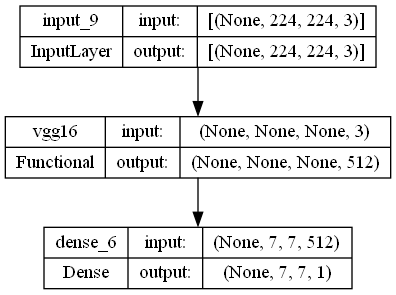

In [27]:
keras.utils.plot_model(model, show_shapes = True)

In [28]:
# 출력 값을 두 개로 바꿔보자.
# backbone 호출
backbone = applications.VGG16(include_top = False)
backbone.trainable = False

# 입력 값 생성
input_tensor = layers.Input(shape = (224, 224, 3))

# backbone 생성
x = backbone(input_tensor)

# 출력 값 생성
gap_tensor = layers.GlobalAveragePooling2D()(x)
drop_tensor = layers.Dropout(0.3)(gap_tensor)
output_tensor1 = layers.Dense(units = 1, activation = 'sigmoid')(x)
output_tensor2 = layers.Dense(units = 1, activation = 'sigmoid')(x)

In [30]:
model = models.Model(input_tensor, [output_tensor1, output_tensor2])
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_11[0][0]']               
                                512)                                                              
                                                                                                  
 dense_7 (Dense)                (None, 7, 7, 1)      513         ['vgg16[0][0]']                  
                                                                                            

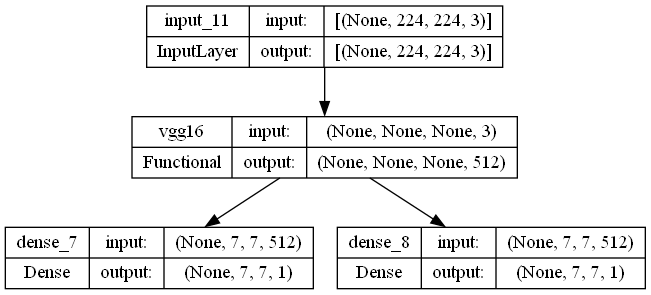

In [31]:
keras.utils.plot_model(model, show_shapes = True)

In [ ]:
# 실행 결과 기존에는 없던 'Connected to' column이 생겼다. 이것이 Functional을 사용하는 이유이다.
# Sequential을 사용하면 출력 값을 하나로밖에 설정하지 못한다.
# 하지만 Functional을 사용하면 출력 값을 여러 개로 만들 수 있다.
# 뿐만 아니라 hidden layer를 여러 갈래로 나눠서 값을 처리하는 것도 가능하다.

## 여러 개의 출력결과를  합치는 Layer

- 앞 레이어들에서 출력된 값이 여러개이고 이것을 하나의 Layer의 입력으로 넣어 줄 경우 **여러개의 출력값을 합쳐 줘야 한다.** 이때 단순이 합치거나 element wise 연산을 통해 합칠 수 있다. 
- 함수와 Layer class 두가지 방식을 제공한다.
    - tensorflow.keras.layers 모듈로 제공
- **concatenate(list, axis=-1)/Concatenate(axis=-1)([list])**
    - 레이어들을 단순히 합친다. (붙이는 처리)
    - list: 합칠 레이어들을 리스트에 묶어 전달
    - axis: 합칠 기준축. (기본값: -1 : 마지막 축기준)
- **add(list)/Add()(list), substract(list)/Subtract()(list), multiply(list)/Multiply()(list)**
    - 같은 index의 값들을 계산해서(더하기, 빼기, 곱하기) 하나의 레이어로 만든다.
    - list: 합칠 레이어들을 리스트에 묶어 전달

In [2]:
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, applications, models

In [ ]:
# ResNet의 Residual Block을 구현해보자. Residual Block을 두 개 쌓아보자.

In [3]:
# 입력 값 생성
input_tensor = layers.Input(shape = (32, 32, 3))

x = layers.Conv2D(filters = 64, kernel_size = 7, padding = 'same', activation = 'relu')(input_tensor)
x = layers.MaxPooling2D(padding = 'same')(x)

# Residual Block 1 생성
# Conv2D - BatchNorm - ReLU
x1 = layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same')(x)
x1 = layers.BatchNormalization()(x1)
x1 = layers.ReLU()(x1)
# Conv2D - BatchNorm
x1 = layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same')(x1)
x1 = layers.BatchNormalization()(x1)
# 입력 값 x와 출력 값 x1을 Add
x1 = layers.Add()([x, x1])
x1 = layers.ReLU()(x1)

# Residual Block 2 생성
# Conv2D - BatchNorm - ReLU
x2 = layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same')(x1)
x2 = layers.BatchNormalization()(x2)
x2 = layers.ReLU()(x2)
# Conv2D - BatchNorm
x2 = layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same')(x2)
x2 = layers.BatchNormalization()(x2)
# 입력 값 x와 출력 값 x1을 Add
x2 = layers.Add()([x1, x2])
x2 = layers.ReLU()(x2)

# 출력 값 생성
output_tensor = x2

In [4]:
rb_model = models.Model(input_tensor, output_tensor)
rb_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 64)   9472        ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 16, 16, 64)   0           ['conv2d[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 16, 16, 64)   36928       ['max_pooling2d[0][0]']          
                                                                                              

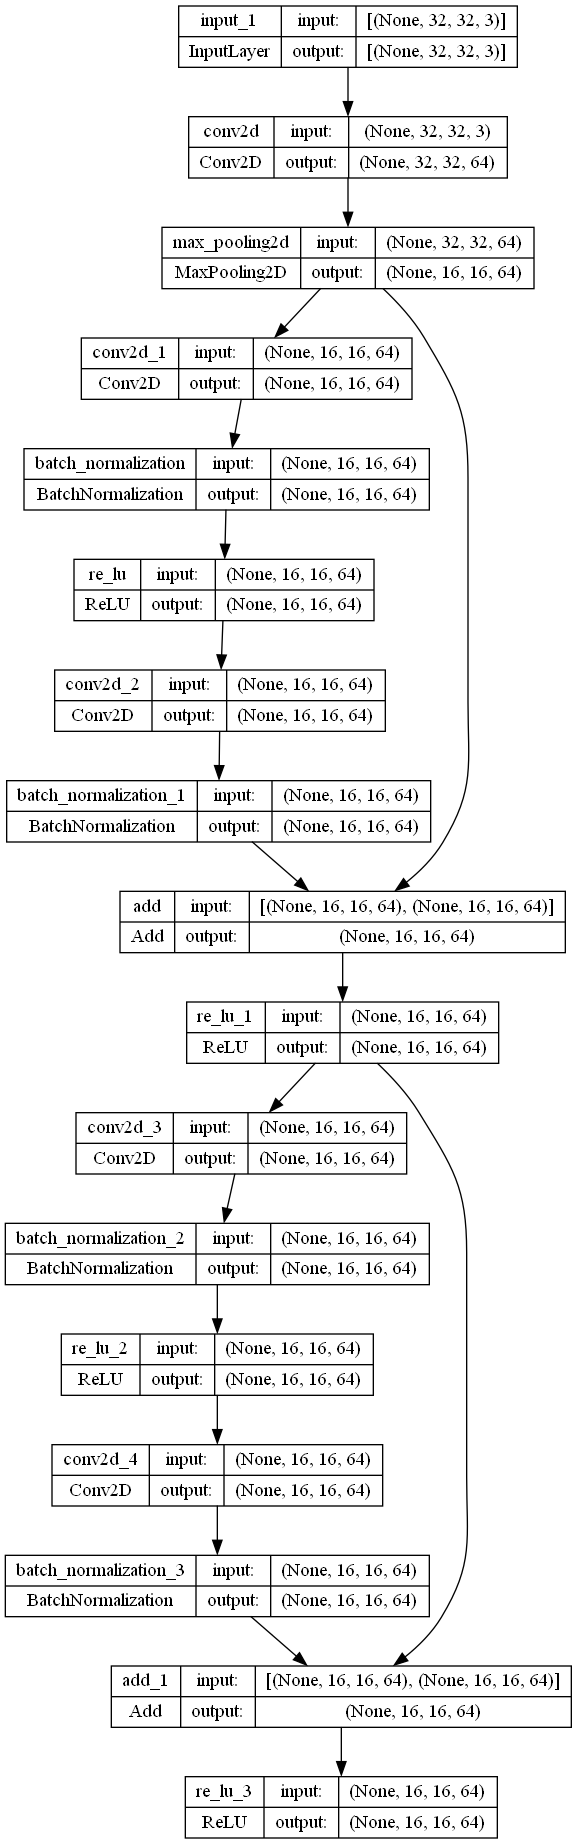

In [8]:
keras.utils.plot_model(rb_model, show_shapes = True)

In [ ]:
# 여러 개의 출력 결과의 값을 합칠 때는 합치고자하는 출력 값들의 shape이 같아야 함에 주의해야 한다.
# 위의 예시에서는 filter의 수가 모두 64로 일정해 출력 값들의 합을 구하는 데에 전혀 문제가 없었다.
# shape이 같지 않으면 합, 차, 곱 계산이 이뤄지지 않는다. 이는 단순힌 배열 연산에서 불가능했던 것과 같은 이유다.
# shape이 같지 않을 때는 pointwise 연산을 해 channel을 조정해 shape을 바꾸는 과정이 필요하다.
# 아래 예시는 Residual Block 1에서 pointwise 연산을 한 모습이다.

In [10]:
# 입력 값 생성
input_tensor = layers.Input(shape = (32, 32, 3))

x = layers.Conv2D(filters = 64, kernel_size = 7, padding = 'same', activation = 'relu')(input_tensor)
x = layers.MaxPooling2D(padding = 'same')(x)

# Residual Block 1 생성
# Conv2D - BatchNorm - ReLU
x1 = layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same')(x)
x1 = layers.BatchNormalization()(x1)
x1 = layers.ReLU()(x1)
# Conv2D - BatchNorm
x1 = layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same')(x1)
x1 = layers.Conv2D(filters = 64, kernel_size = 1, padding = 'same')(x1)
x1 = layers.BatchNormalization()(x1)
# 입력 값 x와 출력 값 x1을 Add
x1 = layers.Add()([x, x1])
x1 = layers.ReLU()(x1)

# Residual Block 2 생성
# Conv2D - BatchNorm - ReLU
x2 = layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same')(x1)
x2 = layers.BatchNormalization()(x2)
x2 = layers.ReLU()(x2)
# Conv2D - BatchNorm
x2 = layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same')(x2)
x2 = layers.BatchNormalization()(x2)
# 입력 값 x와 출력 값 x1을 Add
x2 = layers.Add()([x1, x2])
x2 = layers.ReLU()(x2)

# 출력 값 생성
output_tensor = x2

In [11]:
rb_model = models.Model(input_tensor, output_tensor)
rb_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_8 (Conv2D)              (None, 32, 32, 64)   9472        ['input_3[0][0]']                
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 16, 16, 64)  0           ['conv2d_8[0][0]']               
                                                                                                  
 conv2d_9 (Conv2D)              (None, 16, 16, 64)   36928       ['max_pooling2d_2[0][0]']        
                                                                                            

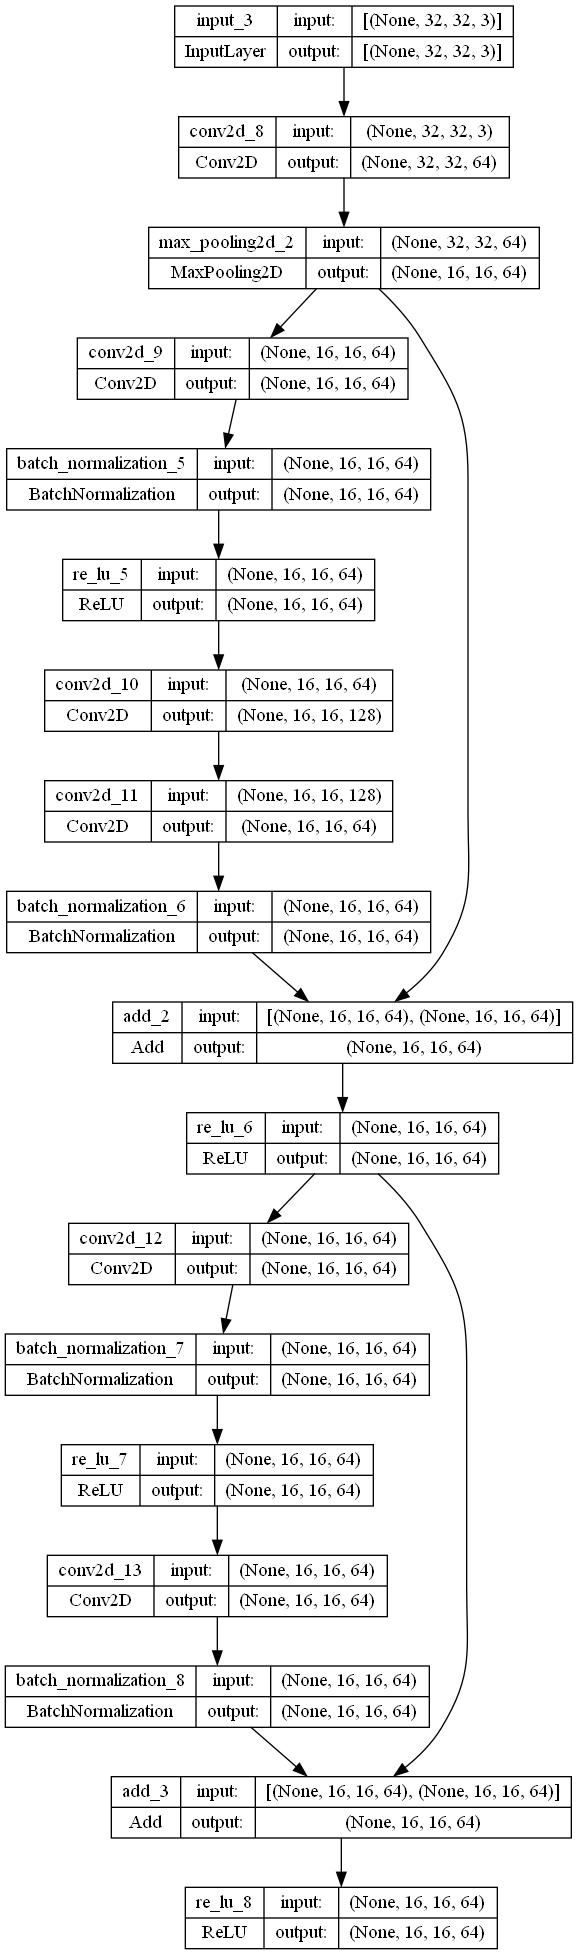

In [12]:
keras.utils.plot_model(rb_model, show_shapes = True)

### 다중 출력 모델
- 가정
    - iris 데이터셋에서 꽃받침의 너비와 높이로 꽃잎의 너비, 높이, 꽃 종류를 예측하는 모델
    - 출력결과가 3개가 나와야 한다.
- X: 꽃받침 너비, 높이
- y: 꽃잎 너비, 높이, 꽃 종류

In [ ]:
# 꽃잎의 너비와 높이를 구하는 문제는 regression 문제이다.
# 꽃의 종류를 구하는 문제는 classification 문제이다.
# 그래서 optimizer와 loss function의 종류가 다르다.

In [ ]:
# class의 개수와 출력 값의 개수는 다르다. 이를 인지해야 한다.
# 지금까지 만든 network의 output layer에서는 unit의 수를 다수로 설정해 입력 값에 대한 class별 확률을 추출했다.
# 그런데 여기서는 출력 결과가 여러 개인 network를 설계해보자. 그 출력 결과에서 class별 확률을 추출할 수 있는 것이다.
# 지금까지 compile 과정은 생략했다. 하지만 여기서는 제대로 한다.
# 출력 결과가 여러 개인 network에서 optimizer와 loss function을 어떻게 설정해야 하는지 익혀보자.

##### 필요한 것 import

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# data 관련
from sklearn.datasets import load_iris

# Network 관련
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

##### data load

In [60]:
X, y = load_iris(return_X_y = True)

##### data의 형태 변환
- 기존 data
    - X: sepal length, sepal width, petal length, petal width
    - y: target
- 변형할 data
    - X: sepal length와 sepal width
    - y1: petal length
    - y2: petal width
    - y3: target

In [61]:
# y 형태 변환
y1 = X[:, 2]
y2 = X[:, 3]
y3 = y

# X 형태 변환
X  = X[:, [0, 1]]

In [62]:
X.shape, y1.shape, y2.shape, y3.shape

((150, 2), (150,), (150,), (150,))

##### 모델 정의 및 컴파일

In [63]:
# Network 정의 - 입력: X, 출력: y1, y2, y3

# Input Layer 생성 - 입력 값 생성
input_tensor = layers.Input(shape = (2, ))

# Hidden Layer 생성
x = layers.Dense(units = 16, activation = 'relu')(input_tensor)
x = layers.Dense(units = 8, activation = 'relu')(x)

# Output layer 생성 - 출력 값 생성
output_tensor_pl = layers.Dense(units = 1, name = 'petal_length_output')(x)
output_tensor_pw = layers.Dense(units = 1, name = 'petal_width_output')(x)
output_tensor_s = layers.Dense(units = 3, activation = 'softmax', name = 'species_output')(x)

# Network 생성
model_iris = models.Model(input_tensor, [output_tensor_pl, output_tensor_pw, output_tensor_s])

In [64]:
model_iris.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense_4 (Dense)                (None, 16)           48          ['input_6[0][0]']                
                                                                                                  
 dense_5 (Dense)                (None, 8)            136         ['dense_4[0][0]']                
                                                                                                  
 petal_length_output (Dense)    (None, 1)            9           ['dense_5[0][0]']                
                                                                                            

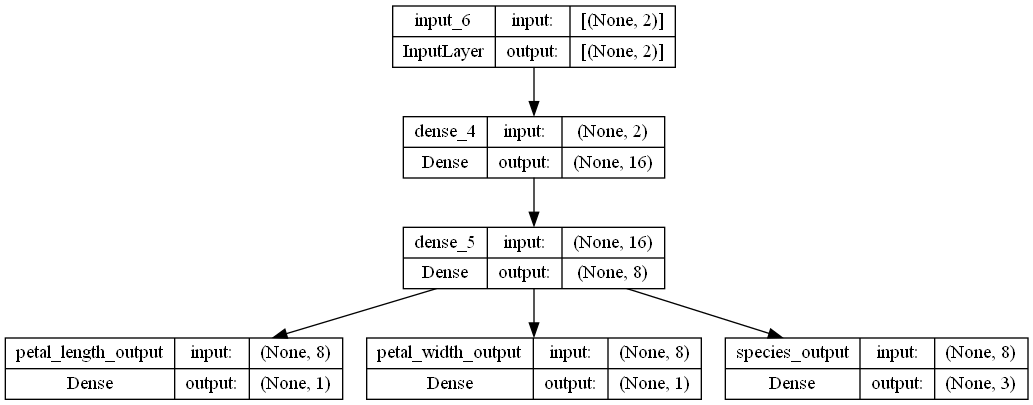

In [65]:
keras.utils.plot_model(model_iris, show_shapes = True)

In [ ]:
# loss function은 각각에 대해 list로 묶어 전달한다.
# 이때 출력 결과가 여러 개인 network는 각 loss를 모두 합해 total loss를 구한다.
# 그리고 이 total loss를 이용해 optimization한다.

In [66]:
# Network Compile
model_iris.compile(optimizer = 'adam', 
                   loss = ['mse', 'mse', 'sparse_categorical_crossentropy'])

##### 학습

In [ ]:
# network를 학습시킬 때도 list로 묶는다.
# 이는 X의 수가 여러 개인 경우에 대해서도 마찬가지이다.

In [67]:
hist_iris = model_iris.fit(X, [y1, y2, y3], 
                           epochs = 100, 
                           validation_split = 0.2
                          )

Epoch 1/100
4/4 [==============================] - 1s 91ms/step - loss: 24.5927 - petal_length_output_loss: 22.5809 - petal_width_output_loss: 0.3064 - species_output_loss: 1.7054 - val_loss: 45.4134 - val_petal_length_output_loss: 42.9217 - val_petal_width_output_loss: 0.9345 - val_species_output_loss: 1.5573
Epoch 2/100
4/4 [==============================] - 0s 16ms/step - loss: 23.2578 - petal_length_output_loss: 21.3840 - petal_width_output_loss: 0.2361 - species_output_loss: 1.6377 - val_loss: 43.2496 - val_petal_length_output_loss: 40.9834 - val_petal_width_output_loss: 0.7190 - val_species_output_loss: 1.5472
Epoch 3/100
4/4 [==============================] - 0s 12ms/step - loss: 21.9605 - petal_length_output_loss: 20.1977 - petal_width_output_loss: 0.1896 - species_output_loss: 1.5732 - val_loss: 41.2441 - val_petal_length_output_loss: 39.1575 - val_petal_width_output_loss: 0.5496 - val_species_output_loss: 1.5369
Epoch 4/100
4/4 [==============================] - 0s 12ms/step 

4/4 [==============================] - 0s 20ms/step - loss: 8.4587 - petal_length_output_loss: 7.0508 - petal_width_output_loss: 0.3439 - species_output_loss: 1.0640 - val_loss: 17.4546 - val_petal_length_output_loss: 15.7726 - val_petal_width_output_loss: 0.1132 - val_species_output_loss: 1.5688
Epoch 28/100
4/4 [==============================] - 0s 13ms/step - loss: 7.6794 - petal_length_output_loss: 6.2413 - petal_width_output_loss: 0.3962 - species_output_loss: 1.0419 - val_loss: 15.6526 - val_petal_length_output_loss: 14.0150 - val_petal_width_output_loss: 0.1088 - val_species_output_loss: 1.5288
Epoch 29/100
4/4 [==============================] - 0s 13ms/step - loss: 6.9128 - petal_length_output_loss: 5.4296 - petal_width_output_loss: 0.4557 - species_output_loss: 1.0274 - val_loss: 13.9442 - val_petal_length_output_loss: 12.3442 - val_petal_width_output_loss: 0.1152 - val_species_output_loss: 1.4849
Epoch 30/100
4/4 [==============================] - 0s 13ms/step - loss: 6.2517 

4/4 [==============================] - 0s 19ms/step - loss: 1.8818 - petal_length_output_loss: 0.8379 - petal_width_output_loss: 0.1236 - species_output_loss: 0.9203 - val_loss: 3.4250 - val_petal_length_output_loss: 1.4665 - val_petal_width_output_loss: 0.3350 - val_species_output_loss: 1.6236
Epoch 54/100
4/4 [==============================] - 0s 20ms/step - loss: 1.8620 - petal_length_output_loss: 0.8222 - petal_width_output_loss: 0.1239 - species_output_loss: 0.9159 - val_loss: 3.3663 - val_petal_length_output_loss: 1.4116 - val_petal_width_output_loss: 0.3232 - val_species_output_loss: 1.6316
Epoch 55/100
4/4 [==============================] - 0s 14ms/step - loss: 1.8446 - petal_length_output_loss: 0.8077 - petal_width_output_loss: 0.1241 - species_output_loss: 0.9127 - val_loss: 3.3221 - val_petal_length_output_loss: 1.3696 - val_petal_width_output_loss: 0.3172 - val_species_output_loss: 1.6353
Epoch 56/100
4/4 [==============================] - 0s 13ms/step - loss: 1.8230 - peta

4/4 [==============================] - 0s 14ms/step - loss: 1.5137 - petal_length_output_loss: 0.5447 - petal_width_output_loss: 0.1401 - species_output_loss: 0.8289 - val_loss: 2.8224 - val_petal_length_output_loss: 0.9320 - val_petal_width_output_loss: 0.2898 - val_species_output_loss: 1.6006
Epoch 80/100
4/4 [==============================] - 0s 15ms/step - loss: 1.5030 - petal_length_output_loss: 0.5377 - petal_width_output_loss: 0.1396 - species_output_loss: 0.8257 - val_loss: 2.8417 - val_petal_length_output_loss: 0.9464 - val_petal_width_output_loss: 0.2993 - val_species_output_loss: 1.5961
Epoch 81/100
4/4 [==============================] - 0s 15ms/step - loss: 1.4917 - petal_length_output_loss: 0.5300 - petal_width_output_loss: 0.1396 - species_output_loss: 0.8221 - val_loss: 2.8052 - val_petal_length_output_loss: 0.9173 - val_petal_width_output_loss: 0.2961 - val_species_output_loss: 1.5918
Epoch 82/100
4/4 [==============================] - 0s 17ms/step - loss: 1.4824 - peta

In [ ]:
# 출력 결과 train data set과 validation data set에 대한 각 출력 결과의 loss가 계산되었다.
# 그리고 train / validation별 total loss가 앞에 위치해 있다.
# 마지막 실행 결과를 보자.
loss: 2.2593 - petal_length_output_loss: 1.0355 - petal_width_output_loss: 0.2577 - species_output_loss: 0.9660 - val_loss: 4.0440 - val_petal_length_output_loss: 1.6701 - val_petal_width_output_loss: 0.5137 - val_species_output_loss: 1.8602
# train의 total loss는 2.2593이고 validation의 total loss는 4.0440이다.

##### 결과 시각화

In [68]:
hist_iris.history.keys()

dict_keys(['loss', 'petal_length_output_loss', 'petal_width_output_loss', 'species_output_loss', 'val_loss', 'val_petal_length_output_loss', 'val_petal_width_output_loss', 'val_species_output_loss'])

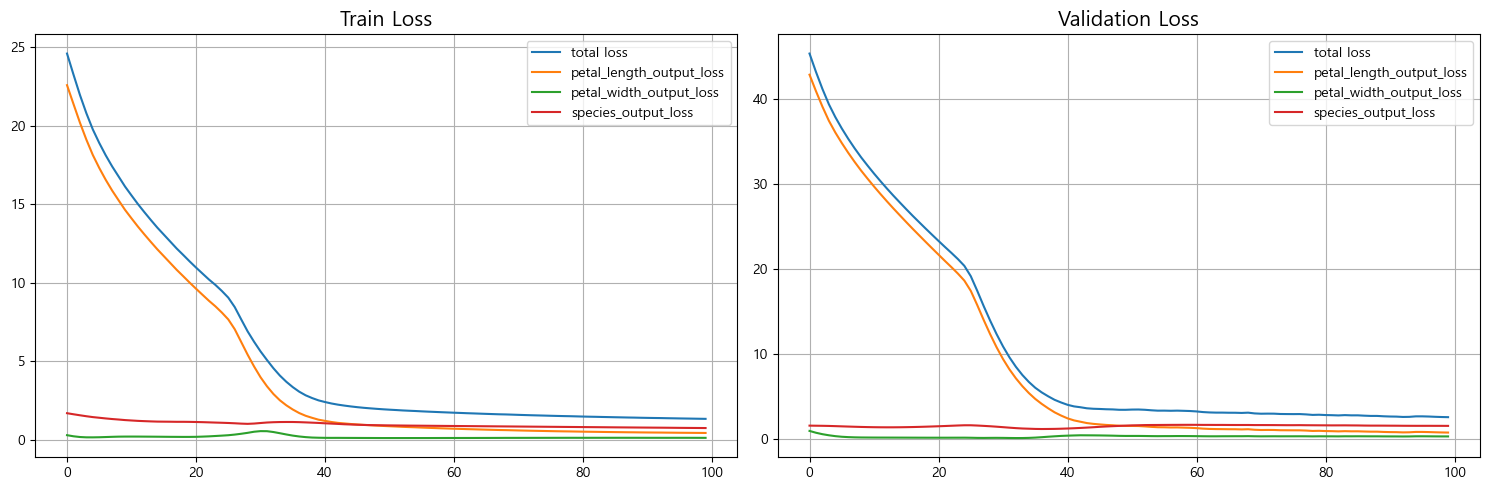

In [73]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(hist_iris.epoch, hist_iris.history['loss'], label = 'total loss')
plt.plot(hist_iris.epoch, hist_iris.history['petal_length_output_loss'], label = 'petal_length_output_loss')
plt.plot(hist_iris.epoch, hist_iris.history['petal_width_output_loss'], label = 'petal_width_output_loss')
plt.plot(hist_iris.epoch, hist_iris.history['species_output_loss'], label = 'species_output_loss')
plt.title('Train Loss', fontsize = 15)
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(hist_iris.epoch, hist_iris.history['val_loss'], label = 'total loss')
plt.plot(hist_iris.epoch, hist_iris.history['val_petal_length_output_loss'], label = 'petal_length_output_loss')
plt.plot(hist_iris.epoch, hist_iris.history['val_petal_width_output_loss'], label = 'petal_width_output_loss')
plt.plot(hist_iris.epoch, hist_iris.history['val_species_output_loss'], label = 'species_output_loss')
plt.title('Validation Loss', fontsize = 15)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

##### 새로운 데이터 추론

In [70]:
new_X = X[:3]
pred = model.predict(new_X)
pred

1/1 [==============================] - 0s 24ms/step


[array([[0.6940555 ],
        [0.59230584],
        [0.6343823 ]], dtype=float32),
 array([[-0.6545611 ],
        [-0.6999291 ],
        [-0.60821474]], dtype=float32),
 array([[0.17755115, 0.67820334, 0.14424554],
        [0.19292621, 0.6606455 , 0.14642827],
        [0.19060998, 0.6528318 , 0.15655828]], dtype=float32)]

In [71]:
# 첫 번째는 petal length, 두 번째는 petal width, 세 번째는 speicies에 대한 결과를 보여준다.
# 세 layer의 출력 결과를 list로 묶어서 출력해준다.

In [72]:
for pl, pw, s in zip(pred[0], pred[1], pred[2]):
    print(pl, pw, s, s.argmax(-1))

[0.6940555] [-0.6545611] [0.17755115 0.67820334 0.14424554] 1
[0.59230584] [-0.6999291] [0.19292621 0.6606455  0.14642827] 1
[0.6343823] [-0.60821474] [0.19060998 0.6528318  0.15655828] 1


In [40]:
y[:3]

array([0, 0, 0])

# 아래는 가상 설정임

## 다중 입력 모델
- 가정 
    - IRIS 꽃 데이터 + 꽃의 사진을 입력해서 꽃의 종류를 예측한다.
- X: 꽃 데이터, 꽃 사진
- y: 꽃 종류

In [ ]:
# table data는 Dense layer 통과
# 영상 data는 Convnolution layer 통과

##### 데이터 로드

In [74]:
X, y = load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

In [75]:
(X_train, _), (_, _) = keras.datasets.mnist.load_data()
X_img = X_train[:150]
X_train.shape, X_img.shape

((60000, 28, 28), (150, 28, 28))

##### 모델생성, 컴파일

In [ ]:
# table data와 영상 data 두 개를 입력으로 받아 iris의 종을 출력하는 network를 생성한다.

In [77]:
# table data의 입력 값 생성
iris_info_tensor = layers.Input(shape = (4, ))

# 영상 data의 입력 값 생성
iris_img_tensor = layers.Input(shape = (28, 28, 1))

# table data 처리
x_info = layers.Dense(units = 32, activation = 'relu')(iris_info_tensor)
x_info = layers.Dense(units = 16, activation = 'relu')(x_info)

# 영상 data 처리
x_img = layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')(iris_img_tensor)
x_img = layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')(x_img)
x_img = layers.MaxPooling2D(padding = 'same')(x_img)
x_img = layers.Flatten()(x_img)

# 처리된 값 합치기 - concatenate
x_final = layers.Concatenate(axis = -1)([x_info, x_img])

# 출력 값 생성
output_tensor = layers.Dense(units = 3, activation = 'softmax')(x_final)

In [79]:
# Network 생성
model = models.Model([iris_info_tensor, iris_img_tensor], output_tensor)

# Network Compile
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [80]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_14 (Conv2D)             (None, 28, 28, 32)   320         ['input_10[0][0]']               
                                                                                                  
 input_9 (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 conv2d_15 (Conv2D)             (None, 28, 28, 32)   9248        ['conv2d_14[0][0]']              
                                                                                            

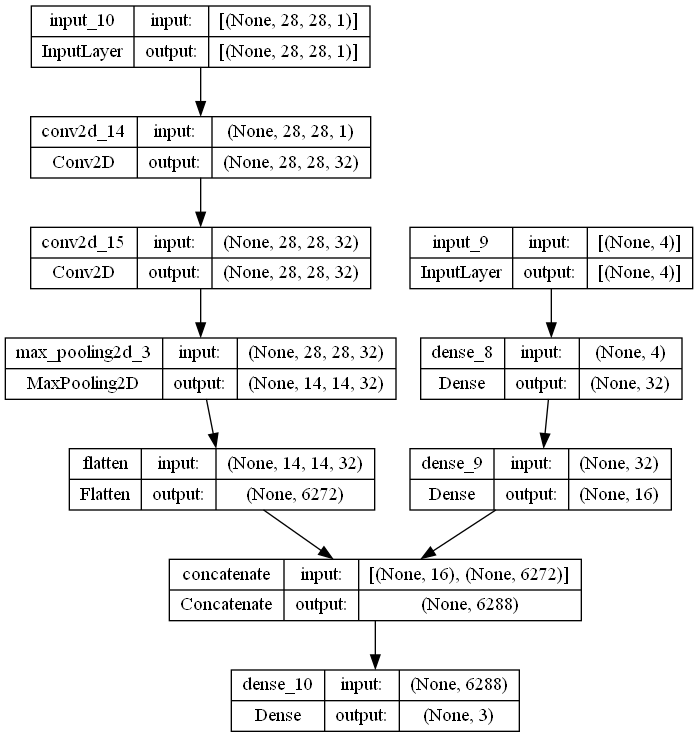

In [82]:
keras.utils.plot_model(model, show_shapes = True)

In [ ]:
# 결과 중요 X

In [85]:
iris_img = X_img[..., np.newaxis]
iris_img.shape

(150, 28, 28, 1)

In [87]:
hist = model.fit([X, iris_img], y, 
                  epochs = 3, 
                  validation_split = 0.2)

Epoch 1/3
4/4 [==============================] - 1s 93ms/step - loss: 16.6732 - accuracy: 0.3083 - val_loss: 26.6235 - val_accuracy: 0.0333
Epoch 2/3
4/4 [==============================] - 0s 30ms/step - loss: 7.9467 - accuracy: 0.5667 - val_loss: 38.2972 - val_accuracy: 0.0000e+00
Epoch 3/3
4/4 [==============================] - 0s 31ms/step - loss: 4.9935 - accuracy: 0.5750 - val_loss: 18.5459 - val_accuracy: 0.0333


## Subclass 방식
- network를 clss로 구현하는 방법이다. keras의 models.Model을 상속받아야 한다.
- \_\_init\_\_() method에서 network에 필요한 자원들(layer들)을 생성한다.
- call method에서 network 구조를 정의한다. magic method는 super class에 정의되어 있기때문에 사용 X
    - call method에서는 data의 흐름을 정의하면 된다.

In [109]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

In [110]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [114]:
class MnistModel(models.Model):
    def __init__(self):
        super().__init__()
        
        self.conv_block1 = keras.Sequential([
            layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'), 
            layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'), 
            layers.MaxPooling2D(padding = 'same')
        ])
        
        self.conv_block2 = keras.Sequential([
            layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'), 
            layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'), 
            layers.MaxPooling2D(padding = 'same')
        ])
        
        self.flatten = layers.Flatten()
        self.output_layer = layers.Dense(units = 10, activation = 'softmax')        
    
    def call(self, x):
        # forward propagation 처리후 추론 결과 반환
        x_block1 = self.conv_block1(x)
        x_block2 = self.conv_block2(x_block1)
        x_flatten = self.flatten(x_block2)
        output_tensor = self.output_layer(x_flatten)
        return output_tensor

In [115]:
# Network 생성
model = MnistModel()

# Network Compile
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy')

In [117]:
# 학습
hist = model.fit(X_train, y_train, epochs = 3, validation_split = 0.25)

Epoch 1/3
1407/1407 [==============================] - 55s 39ms/step - loss: 0.0508 - val_loss: 0.0462
Epoch 2/3
1407/1407 [==============================] - 60s 43ms/step - loss: 0.0339 - val_loss: 0.0454
Epoch 3/3
1407/1407 [==============================] - 61s 43ms/step - loss: 0.0255 - val_loss: 0.0371


In [ ]:
# batch_size의 기본값은 32이다. 그래서 60000 * 0.75 / 32 = 1406.25에 의해 step이 1407로 계산된다.

In [118]:
model.summary()

Model: "mnist_model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_12 (Sequential)  (None, 14, 14, 32)        9568      
                                                                 
 sequential_13 (Sequential)  (None, 7, 7, 64)          55424     
                                                                 
 flatten_6 (Flatten)         multiple                  0         
                                                                 
 dense_16 (Dense)            multiple                  31370     
                                                                 
Total params: 96,362
Trainable params: 96,362
Non-trainable params: 0
_________________________________________________________________


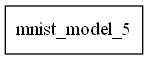

In [120]:
keras.utils.plot_model(model, show_shapes = True)